# **ChefBot**

สมาชิกกลุ่ม 1

1. ก้องภพ ทองดี 63340500003 
2. ภคพล ลีลาคหกิจ 63340500045
3. สรพัศ วีระกุล 63340500064
4. อธิเมศร์  เอี๊ยวเจริญ 63340500068 

# **Import Library**

In [1]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import tensorflow as tf
print(tf. __version__) 
print(tf.config.list_physical_devices('GPU'))

import matplotlib as mpl
import matplotlib.font_manager as fm

fm.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

np.random.seed(0)
global_seed = 0

pic_path = 'pic/'

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **Import data**

In [2]:
df_orig = pandas.read_csv('data/Chefbot_Dataset - All.csv', encoding='utf-8')

In [3]:
# Display the first 5 rows of the dataframe
display(df_orig.head(n=5))
# Display the last 5 rows of the dataframe
display(df_orig.tail(n=5))

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


,Text,Mainclass,Subclass
571,เมนูที่เอาเส้นพาสต้ามาผัดกับของทะเลแล้วแล้วก็ใ...,สปาเกตตี,สปาเกตตีทะเล
572,สปาเกตตีที่มีสีแดง และเขียวตัดกับ สีของเส้นที่...,สปาเกตตี,สปาเกตตีทะเล
573,ฉันอยากกินสปาเกตตีแต่ฉันเบื่อพวกเนื้อ หมู ไก่แ...,สปาเกตตี,สปาเกตตีทะเล
574,สปาเกตตีที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์,สปาเกตตี,สปาเกตตีทะเล
575,สปาเกตตีที่ให้รสชาติเผ็ดจัดจ้าน มีกุ้ง มีหมึก ...,สปาเกตตี,สปาเกตตีทะเล


# **Data Preprocessing**

In [4]:
df_prepro = df_orig.copy()

## **Data Cleaning**

In [5]:
display(df_prepro.describe())
display(df_prepro.Mainclass.unique())
display(df_prepro.Subclass.unique())

,Text,Mainclass,Subclass
count,576,576,576
unique,576,3,12
top,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
freq,1,192,48


array(['พิซซ่า', 'ก๋วยเตี๋ยว', 'สปาเกตตี'], dtype=object)

array(['ค็อกเทลกุ้ง', 'มีทเดอลุกซ์', 'เห็ดและมะเขือเทศ', 'ดิปเปอร์',
       'ก๋วยเตี๋ยวน้ำตก', 'ก๋วยเตี๋ยวต้มยำน้ำใส', 'บะหมีหมูแดงหมูกรอบ',
       'เกาเหลา', 'สปาเกตตีมีทบอล', 'สปาเกตตีคาโบนาร่า', 'สปาเกตตีผัก',
       'สปาเกตตีทะเล'], dtype=object)

### **Remove Duplications in text inputs**

In [6]:
# display all text that appears more than once
display(df_prepro[df_prepro.duplicated('Text', keep=False)].sort_values('Text'))
# Then no duplicates

,Text,Mainclass,Subclass


### **Remove unwanted character**

#### **Front-Back white space**

In [7]:
def strip_space(text):
    return text.strip()

df_prepro['Text'] = df_prepro['Text'].apply(strip_space)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove white space between words**

In [8]:
def remove_whitespace(text):
    return text.replace(" ", "")

df_prepro['Text'] = df_prepro['Text'].apply(remove_whitespace)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆกับน้ำสลัดเทาซันไอส...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมๆสามารถแบ่งเป็นชิ้นได้กินกั...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove special character and punctuation**

In [9]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
thai_punctuation = 'ๆ'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation + thai_punctuation))
 
df_prepro['Text'] = df_prepro['Text'].apply(remove_punctuation)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,พิซซ่า,ค็อกเทลกุ้ง


### **Label Mapping**

In [10]:
def get_label_map(df, col_name):
    label_map = {}
    for i, label in enumerate(df[col_name].unique()):
        label_map[label] = i
    reversed_label_map = {v: k for k, v in label_map.items()}
    return label_map, reversed_label_map

#### **Get main class labels**

In [11]:
mainclass_label_map, reversed_mainclass_label_map = get_label_map(df_prepro, 'Mainclass')

display(mainclass_label_map)

df_prepro['Mainclass'] = df_prepro['Mainclass'].map(mainclass_label_map)

display(df_prepro.head())

{'พิซซ่า': 0, 'ก๋วยเตี๋ยว': 1, 'สปาเกตตี': 2}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,ค็อกเทลกุ้ง


#### **Get sub class labels**

In [12]:
subclass_label_map, reversed_subclass_label_map = get_label_map(df_prepro, 'Subclass')

display(subclass_label_map)

df_prepro['Subclass'] = df_prepro['Subclass'].map(subclass_label_map)

display(df_prepro.head())

{'ค็อกเทลกุ้ง': 0,
 'มีทเดอลุกซ์': 1,
 'เห็ดและมะเขือเทศ': 2,
 'ดิปเปอร์': 3,
 'ก๋วยเตี๋ยวน้ำตก': 4,
 'ก๋วยเตี๋ยวต้มยำน้ำใส': 5,
 'บะหมีหมูแดงหมูกรอบ': 6,
 'เกาเหลา': 7,
 'สปาเกตตีมีทบอล': 8,
 'สปาเกตตีคาโบนาร่า': 9,
 'สปาเกตตีผัก': 10,
 'สปาเกตตีทะเล': 11}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,0
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,0
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,0
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,0
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,0


## **Data Visualization**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def plot_sentence_length_distribution(df, col_name):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (12, 8)
    
    bin_size = 5
    bins = np.arange(0, 100, bin_size)
    plt.hist(df[col_name].str.len(), bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='train')
    xticks = np.arange(0, 150, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, 100, bin_size)
    plt.yticks(yticks, yticks)
    plt.title('Sentence Length Distribution')
    plt.legend(loc='upper right')
    plt.xlabel('Sentence Length')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name].str.len(), bins=bins)[0]):
        plt.text(a + 2.5, b + 2.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

### **Plotting the length of the text data**

In [15]:
# plot_sentence_length_distribution(df_prepro, 'Text')

#### **Maximum length of text inputs**

In [16]:
print('Max sentence length: %d' % df_prepro['Text'].str.len().max())

df_prepro['Text'].str.len().describe()

Max sentence length: 165


count    576.000000
mean      87.987847
std       26.557073
min       18.000000
25%       69.000000
50%       86.000000
75%      106.000000
max      165.000000
Name: Text, dtype: float64

### **Plot the distribution of labels**

In [17]:
def plot_label_distribution(df, col_name, title):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (6, 4)
    
    bin_size = 1
    bins = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.hist(df[col_name], bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='data')
    xticks = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, df[col_name].value_counts().max() + 100, 500)
    plt.yticks(yticks, yticks)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xlabel('Object')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name], bins=bins)[0]):
        plt.text(a + 0.5, b + 0.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

In [18]:
# plot_label_distribution(df_prepro, 'Mainclass', 'Mainclass Distribution')

In [19]:
# plot_label_distribution(df_prepro, 'Subclass', 'Subclass Distribution')

# **Keras Preprocessing**

In [20]:
df_keras = df_prepro.copy()

In [21]:
df_keras = df_keras.to_numpy()
df_keras

array([['อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์แลนด์ที่มีความเข้มข้นหอมแป้งเยอะ',
        0, 0],
       ['ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามสามารถหยิบกินได้เป็นชิ้นเน้นเนื้อที่มาจากทะเล',
        0, 0],
       ['ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ชื่นชอบอาหารทะเลราคาไม่แพงหาซื้อได้ง่าย',
        0, 0],
       ...,
       ['ฉันอยากกินสปาเกตตีแต่ฉันเบื่อพวกเนื้อหมูไก่แล้วช่วยแนะนำเมนูให้ฉันหน่อย',
        2, 11],
       ['สปาเกตตีที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์', 2, 11],
       ['สปาเกตตีที่ให้รสชาติเผ็ดจัดจ้านมีกุ้งมีหมึกมีหอยและยังใส่พวกพริกไทยอ่อน',
        2, 11]], dtype=object)

## **Word Tokenization**

In [22]:
import pythainlp
from pythainlp import word_tokenize
from keras.utils import pad_sequences

In [23]:
input_tokenize = df_keras.copy()
for i, sentence in enumerate(input_tokenize[:, 0]):
    input_tokenize[i, 0] = np.array(word_tokenize(sentence, engine='newmm'), dtype=object)

input_tokenize = np.asarray(input_tokenize, dtype=object)

max_len = max(len(seq) for seq in input_tokenize[:, 0]) + 10

for i in range(len(input_tokenize)):
    input_tokenize[i, 0] = np.pad(input_tokenize[i, 0], (0, max_len - len(input_tokenize[i, 0])), constant_values=" ")

print("Example after padding:")
print(input_tokenize[500])

print(f"Data shape: {input_tokenize.shape}")

for seq in input_tokenize[:, 0]:
    if seq.shape[0] != 50:
        print("ไม่เท่ากับ 50")

print("เท่ากับ 50")

Example after padding:
[array(['อยาก', 'กิน', 'อะไร', 'ก็', 'ได้ที่', 'มี', 'ชีส', 'ผัก', 'เพราะ',
        'กิน', 'คีโม', 'ขอ', 'เมนู', 'ทำ', 'ง่าย', 'ใช้เวลา', 'ไม่', 'นาน',
        'มี', 'สารอาหาร', 'พวก', 'คา', 'โบ', 'ไฮ', 'เด', 'รต', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)
 2 10]
Data shape: (576, 3)
เท่ากับ 50


In [24]:
sentence = input_tokenize[:, 0]
mainclass_labels = input_tokenize[:, 1]
subclass_labels = input_tokenize[:, 2]

print(f'Example sentence: {sentence[0]}')
print(f'Example mainclass label: {mainclass_labels[0]}')
print(f'Example subclass label: {subclass_labels[0]}')

print('Shape')
print(f'Sentence: {sentence.shape}')
print(f'Mainclass label: {mainclass_labels.shape}')
print(f'Subclass label: {subclass_labels.shape}')

Example sentence: ['อยาก' 'กิน' 'กุ้ง' 'ที่จะ' 'มี' 'ความ' 'หนุบ' 'กับ' 'น้ำสลัด' 'เทา'
 'ซัน' 'ไอส์แลนด์' 'ที่' 'มี' 'ความ' 'เข้มข้น' 'หอม' 'แป้ง' 'เยอะ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Example mainclass label: 0
Example subclass label: 0
Shape
Sentence: (576,)
Mainclass label: (576,)
Subclass label: (576,)


## **Word Count**

In [25]:
from collections import Counter

word_counts = Counter()
for data in input_tokenize[:,0]:
    word_counts.update(data)
    
display(word_counts.most_common(15))

[(' ', 16825),
 ('มี', 630),
 ('ที่', 580),
 ('กิน', 360),
 ('และ', 325),
 ('เป็น', 251),
 ('อาหาร', 235),
 ('เส้น', 220),
 ('ได้', 185),
 ('อยาก', 160),
 ('กับ', 144),
 ('ไม่', 140),
 ('ของ', 134),
 ('รสชาติ', 132),
 ('ผัก', 125)]

In [26]:
# Find maximym vocabulary size
max_vocab_size = len(word_counts) + 1 # +1 for unknown token
print(f'Maximum vocabulary size from data set: {max_vocab_size}')
# Find maximum sentence length
max_len = max([len(sentence) for sentence in input_tokenize[:,0]])
print(f'Maximum sentence length from data set: {max_len}')

# Set parameters
max_vocab_size = 5000 # Set maximum vocabulary size to 5000 word (including unknown token)
max_len = 50 # Set maximum sentence length to 50 word per input text

Maximum vocabulary size from data set: 1262
Maximum sentence length from data set: 50


## **Word Vectorization**

In [27]:
sentence[0]

array(['อยาก', 'กิน', 'กุ้ง', 'ที่จะ', 'มี', 'ความ', 'หนุบ', 'กับ',
       'น้ำสลัด', 'เทา', 'ซัน', 'ไอส์แลนด์', 'ที่', 'มี', 'ความ',
       'เข้มข้น', 'หอม', 'แป้ง', 'เยอะ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
      dtype=object)

In [28]:
from pythainlp import word_vector
wordVector = word_vector.WordVector(model_name="thai2fit_wv").get_model() # load thai2fit_wv from pythainlp

In [29]:
def map_word_to_vector(word):
    try:
        return wordVector[word]
    except KeyError:
        return np.zeros(wordVector.vector_size)

sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in input_tokenize[:,0]],dtype=object)

print(f'Sentence vector shape: {sentence_vector.shape}')

Sentence vector shape: (576, 50, 300)


In [30]:
sentence_vector[0].shape

(50, 300)

In [31]:
sentence_vector[0][0].shape

(300,)

### **One-hot encoding**

In [32]:
from keras.utils import to_categorical

mainclass_labels = to_categorical(mainclass_labels)
subclass_labels = to_categorical(subclass_labels)

print('Mainclass labels shape:', mainclass_labels.shape)
print('Subclass labels shape:', subclass_labels.shape)

Mainclass labels shape: (576, 3)
Subclass labels shape: (576, 12)


## **Train-Test Split**

In [33]:
label_mainclass = np.zeros([576,1])
for i in range(0,576):
    label_mainclass[i] = i
# print(label_mainclass)

mainclass_labels = np.concatenate((mainclass_labels, label_mainclass), axis=1)
subclass_labels = np.concatenate((subclass_labels, label_mainclass), axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_main_class, y_test_main_class, y_train_sub_class, y_test_sub_class = train_test_split(sentence_vector, mainclass_labels, subclass_labels, train_size=0.8, shuffle=True)

In [35]:
label_mainclass_keep_train = y_train_main_class[:, -1]
label_subclass_keep_train = y_train_sub_class[:, -1]
label_mainclass_keep_test = y_test_main_class[:, -1]
label_subclass_keep_test = y_test_sub_class[:, -1]

y_train_main_class = np.delete(y_train_main_class, -1, axis=1)
y_train_sub_class = np.delete(y_train_sub_class, -1, axis=1)
y_test_main_class = np.delete(y_test_main_class, -1, axis=1)
y_test_sub_class = np.delete(y_test_sub_class, -1, axis=1)

In [36]:
print(label_mainclass_keep_train)

[426. 122. 525. 118. 298. 245. 319. 336. 428. 179. 562. 240. 420. 252.
 249. 320. 372. 367. 134. 356. 557. 162. 196. 347. 233. 454. 523. 357.
 140. 521. 404. 113. 378.  76. 172. 505. 157. 572. 515. 312. 348. 303.
 438. 366. 112.  68. 332. 188.  65. 452. 126. 443. 242. 354. 315. 427.
 343. 456. 137. 549.   7. 422. 530. 229. 560. 407. 567. 155. 329. 185.
 101.  97.  20. 153.  54.  30. 334.  49. 100. 425. 284. 358. 316.  56.
 144.  60. 194. 341.   6.   8. 568. 391. 208. 264. 489. 345. 333.  38.
 230. 403. 272. 306. 293. 344. 575. 424. 163. 124. 154. 399.  59. 285.
  48. 541. 570. 468. 310. 516. 243.  55. 171. 469. 181. 158. 246.  34.
 409.  18. 330. 466.  51. 219. 556. 278.  52.  74.  26. 173.  92. 167.
   4. 554. 392. 446. 482.   5. 141. 340. 135. 437. 476.  22. 220. 524.
 120.  81. 400. 571. 561. 555. 160. 564. 238. 350. 402. 195. 191. 116.
 382. 490. 164. 106. 417.  63. 105. 429. 565. 496. 355.  93. 408. 479.
 493. 198. 145. 150.  39. 527. 362. 253. 339.  69.   2. 221. 539. 146.
 289. 

In [37]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train_main_class shape: {y_train_main_class.shape}')
print(f'y_train_sub_class shape: {y_train_sub_class.shape}')
print('-----------------------------------------')
print(f'X_test shape: {X_test.shape}')
print(f'y_test_main_class shape: {y_test_main_class.shape}')
print(f'y_test_sub_class shape: {y_test_sub_class.shape}')

X_train shape: (460, 50, 300)
y_train_main_class shape: (460, 3)
y_train_sub_class shape: (460, 12)
-----------------------------------------
X_test shape: (116, 50, 300)
y_test_main_class shape: (116, 3)
y_test_sub_class shape: (116, 12)


Converting the data from numpy array to Tensorflow Dataset

In [38]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_main_class = tf.convert_to_tensor(y_train_main_class, dtype=tf.float32)
y_test_main_class = tf.convert_to_tensor(y_test_main_class, dtype=tf.float32)
y_train_sub_class = tf.convert_to_tensor(y_train_sub_class, dtype=tf.float32)
y_test_sub_class = tf.convert_to_tensor(y_test_sub_class, dtype=tf.float32)

# **Modeling**

## **Import Library**

In [39]:
# Train model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from time import time
from datetime import timedelta
import keras
from keras.models import load_model
import os

from keras.utils import plot_model

# Build model
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,LSTM, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten,GlobalMaxPooling1D
from keras.layers import Concatenate, Lambda, Reshape, RepeatVector,Multiply
from keras.optimizers import Adam
from keras import backend as K                                                          
from keras.callbacks import ModelCheckpoint, TensorBoard

# Classifications report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

In [40]:
max_len = 50
word_vector_size = 300
main_class_label = ['Pizza', 'Noodle', 'Spaghetti']
sub_class_label = {
            'Pizza': ['ShrimpCocktail', 'MeatDeluxe', 'MushroomsTomatoes', 'Dipper'],
            'Noodle': ['NamTok', 'TomYam', 'EggNoodles', 'Kaolao'],
            'Spaghetti': ['Meatball', 'Carbonara', 'Vegetable', 'Seafood']
        }

## **Baseline Main-Sub Class Model**

### **Model Architecture**

In [41]:
input_layer = Input(shape=(max_len, word_vector_size), dtype='float32')
masking_layer = Masking(mask_value=0.0)(input_layer)
conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(masking_layer)
bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(conv1d_layer_1)
dropout_layer_1 = Dropout(0.2)(bi_lstm_layer_1)
# Main class output
global_max_pooling_layer_1 = GlobalMaxPooling1D()(dropout_layer_1)
main_class_output_layer = Dense(len(main_class_label), activation='softmax', name='main_class_output')(global_max_pooling_layer_1)
# Sub class output
bi_lstm_layer_sub = Bidirectional(LSTM(32, return_sequences=True))(dropout_layer_1)
global_max_pooling_layer_sub = GlobalMaxPooling1D()(bi_lstm_layer_sub)
dense_layer_sub = Dense(64, activation='relu')(global_max_pooling_layer_sub)
sub_class_output_layer = Dense(12, activation='softmax', name='sub_class_output')(dense_layer_sub)

# Define the model
model_base = Model(inputs=input_layer, outputs=[main_class_output_layer,sub_class_output_layer])
         
loss = {'main_class_output': 'categorical_crossentropy',
         'sub_class_output': 'categorical_crossentropy'}
loss_weights = {'main_class_output': 1.0,
                'sub_class_output': 1.0}
metrics = {'main_class_output': 'accuracy',
            'sub_class_output': 'accuracy'}
optimizer = Adam(learning_rate=0.001)
model_base.compile(optimizer=optimizer, loss=loss, loss_weights=loss_weights, metrics=metrics)
model_base.summary()
plot_model(model_base, to_file='BaselineModel.png', show_shapes=True, show_layer_names=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 300)]    0           []                               
                                                                                                  
 masking (Masking)              (None, 50, 300)      0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 48, 32)       28832       ['masking[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 48, 64)       16640       ['conv1d[0][0]']                 
                                                                                              

### **Model Training**

In [42]:
model_base.fit(
    x = X_train,
    y = {'main_class_output': y_train_main_class,
         'sub_class_output': y_train_sub_class},
    epochs = 15,
    batch_size = 4,
    verbose = 1,
    )

Epoch 1/15
115/115 [==============================] - 14s 24ms/step - loss: 3.5450 - main_class_output_loss: 1.0587 - sub_class_output_loss: 2.4863 - main_class_output_accuracy: 0.4239 - sub_class_output_accuracy: 0.1022
Epoch 2/15
115/115 [==============================] - 2s 21ms/step - loss: 3.0613 - main_class_output_loss: 0.7634 - sub_class_output_loss: 2.2979 - main_class_output_accuracy: 0.7217 - sub_class_output_accuracy: 0.1435
Epoch 3/15
115/115 [==============================] - 2s 19ms/step - loss: 2.6379 - main_class_output_loss: 0.5970 - sub_class_output_loss: 2.0409 - main_class_output_accuracy: 0.7761 - sub_class_output_accuracy: 0.2174
Epoch 4/15
115/115 [==============================] - 2s 19ms/step - loss: 2.2814 - main_class_output_loss: 0.4271 - sub_class_output_loss: 1.8543 - main_class_output_accuracy: 0.8261 - sub_class_output_accuracy: 0.2609
Epoch 5/15
115/115 [==============================] - 2s 17ms/step - loss: 1.9740 - main_class_output_loss: 0.3047 - su

### **Model Evaluation**

In [43]:
pred = model_base.predict(X_test)

4/4 [==============================] - 1s 9ms/step


In [44]:
print(f'Length of pred: {len(pred)}')
print(f'Shape of pred[0]: {pred[0].shape}')
print(f'Shape of pred[1]: {pred[1].shape}')

Length of pred: 2
Shape of pred[0]: (116, 3)
Shape of pred[1]: (116, 12)


#### **Main Class result**

              precision    recall  f1-score   support

           0       0.64      0.91      0.75        33
           1       0.90      0.68      0.77        40
           2       0.79      0.72      0.76        43

    accuracy                           0.76       116
   macro avg       0.78      0.77      0.76       116
weighted avg       0.79      0.76      0.76       116



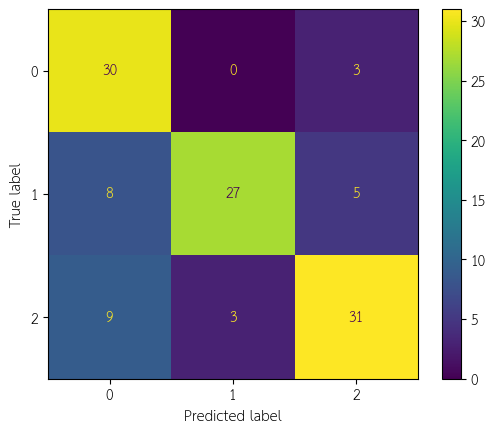

In [45]:
pred_main_class = np.argmax(pred[0], axis=1)
print(classification_report(np.argmax(y_test_main_class, axis=1), pred_main_class))
# plot confusion matrix
cm = confusion_matrix(np.argmax(y_test_main_class, axis=1), pred_main_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2'])
disp.plot()

In [55]:
true_index = []     # เก็บ index ที่ทำนายถูกต้อง
for i in range(len(np.argmax(y_test_main_class, axis=1))):
    if np.argmax(y_test_main_class, axis=1)[i] == pred_main_class[i]:
        true_index.append(i)

false_main_label_baseline = []        # เก็บ index label ที่ทำนายผิด เพื่อเอา index นี้ไปหาประโยคที่ทำนายผิดใน excel
what_pred = []
for j in range(len(label_mainclass_keep_test)):
    if j not in true_index:
        false_main_label_baseline.append(label_mainclass_keep_test[j])
        what_pred.append(np.argmax(pred[0], axis=1)[j])

print(false_main_label_baseline)
print('------------------------------')
print(what_pred)

[236.0, 497.0, 526.0, 498.0, 263.0, 37.0, 337.0, 478.0, 439.0, 276.0, 522.0, 484.0, 279.0, 15.0, 361.0, 351.0, 17.0, 271.0, 281.0, 375.0, 440.0, 533.0, 390.0, 282.0, 299.0, 261.0, 508.0, 397.0]
------------------------------
[0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1]


ตัวอย่างประโยคที่โมเดล Baseline ทำนายหมวดหมู่หลักผิด
- อยากกินก๋วยเตี๋ยวที่ใส่เนื้อ เพราะเราเป็นคนไม่กินหมูพอจะมีอะไรแนะนำมั้ย | ทำนาย ก๋วยเตี๋ยว เป็น พิซซ่า
- อาหารที่มีส่วนผสมคือไข่และซีสหอม ๆ กับครีมซอสที่เข้มข้นน่ากินมาก | ทำนาย สปาเกตตี เป็น พิซซ่า
- อยากได้เมนูที่มีแป้ง และก็มีผักเยอะๆ ที่เคี้ยวง่ายๆ ไม่ต้องออกแรงเยอะ | ทำนาย สปาเกตตี เป็น พิซซ่า
- อยากได้ความเค็มกับความเหนียวของเนื่อกินคู้กับเส้น และซอสที่ทำจากมะเขือเทศ | ทำนาย สปาเกตตี เป็น ก๋วยเตี๋ยว
- พิซซ่าที่เราสามารถลองซอสพิซซ่าได้มากถึง 4 ซอสสูตรเด็ดภายในพิซซ่าตัวนี้ได้เลย | ทำนาย พิซซ่า เป็น ก๋วยเตี๋ยว
- อยากกินอาหารทะเล ประเภทแป้งที่เป็นเส้น มีความเหนียวหนึบ อาจจะมีซอสซีฟู๊ดเป็นเครื่องเคียงด้วย | ทำนาย สปาเกตตี เป็น ก๋วยเตี๋ยว
- พิซซ่าที่มีกุ้ง เห็ด  สับปะรด มันชื่อว่าพิซซ่าอะไร | ทำนาย พิซซ่า เป็น ก๋วยเตี๋ยว
- สามารถหาซื้อได้จากร้านสะดวกซื้อร้านอาหารทั่วไป มีแป้งและไขมันเยอะ และโปรตีนเล็กน้อย | ทำนาย สปาเกตตี เป็น พิซซ่า
- อยากกินเบคอน บาร์บีคิว ชิกเก้น และเป๊ปเปอโรนี ขอเป็นอาหารแป้งๆ ร้อนๆ และกินง่ายๆ ใช้มือกินได้ เป็นอาหารต่างประเทศด้วย | ทำนาย พิซซ่า เป็น สปาเกตตี
- อยากกินสปาเกตตีผัก | ทำนาย สปาเกตตี เป็น ก๋วยเตี๋ยว
- อยากอาหารที่เป็นเส้นรสชาติเปรี้ยวๆ เผ็ดๆ | ทำนาย ก๋วยเตี๋ยว เป็น สปาเกตตี
- ฉันเป็นคนที่ไม่ค่อยกินเนื้อสัตว์เท่าไหร่มีสปาเกตตีอะไรที่แนะนำฉันมั้ย | ทำนาย สปาเกตตี เป็น พิซซ่า

สามารถสรุปได้ดังนี้
- ส่วนมากประโยคที่ทายผิดจะมีชื่อของหมวดหมู่หลักอยู่ในประโยค (เช่น พิซซ่า, ก๋วยเตี๋ยว, เเละสปาเกตตี)
- บางประโยคไม่ได้ลงรายละเอียดที่สำคัญและมีความกำกวม เช่น 'อยากได้เมนูที่มีแป้ง และก็มีผักเยอะๆ ที่เคี้ยวง่ายๆ ไม่ต้องออกแรงเยอะ' หรือ 'สามารถหาซื้อได้จากร้านสะดวกซื้อร้านอาหารทั่วไป มีแป้งและไขมันเยอะ และโปรตีนเล็กน้อย' ที่ไม่ได้ลงรายละเอียดว่าเป็นเส้นหรือไม่ มีเเค่บอกว่าเป็นเเป้ง (ซึ่งทั้งสามหมวดหมู่หลักล้วนเป็นเเป้ง) ทำให้โมเดลสับสนระหว่างสปาเกตตีกับพิซซ่า

#### **Sub Class result**

              precision    recall  f1-score   support

           0       0.33      0.36      0.35        11
           1       1.00      0.12      0.22         8
           2       0.23      0.38      0.29         8
           3       0.25      0.83      0.38         6
           4       0.33      0.15      0.21        13
           5       0.33      0.08      0.13        12
           6       0.28      0.71      0.40         7
           7       0.60      0.38      0.46         8
           8       0.33      0.50      0.40         8
           9       0.43      0.30      0.35        10
          10       0.67      0.43      0.52        14
          11       0.40      0.36      0.38        11

    accuracy                           0.35       116
   macro avg       0.43      0.38      0.34       116
weighted avg       0.44      0.35      0.34       116



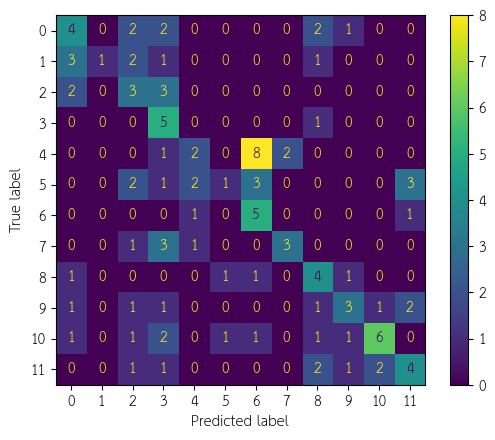

In [57]:
pred_sub_class = np.argmax(pred[1], axis=1)
print(classification_report(np.argmax(y_test_sub_class, axis=1), pred_sub_class,zero_division=0))
# plot confusion matrix
cm = confusion_matrix(np.argmax(y_test_sub_class, axis=1), pred_sub_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11'])
disp.plot()

<H4>Sub class - Baseline

In [58]:
true_index = []     # เก็บ index ที่ทำนายถูกต้อง
for i in range(len(np.argmax(y_test_sub_class, axis=1))):
    if np.argmax(y_test_sub_class, axis=1)[i] == pred_sub_class[i]:
        true_index.append(i)

false_sub_label_baseline = []        # เก็บ index label ที่ทำนายผิด เพื่อเอา index นี้ไปหาประโยคที่ทำนายผิดใน excel
what_pred = []
for j in range(len(label_subclass_keep_test)):
    if j not in true_index:
        false_sub_label_baseline.append(label_subclass_keep_test[j])
        what_pred.append(np.argmax(pred[1], axis=1)[j])

print(false_sub_label_baseline)
print('------------------------------')
print(what_pred)

[540.0, 236.0, 497.0, 538.0, 211.0, 526.0, 225.0, 498.0, 545.0, 200.0, 263.0, 37.0, 337.0, 478.0, 90.0, 250.0, 31.0, 14.0, 1.0, 364.0, 224.0, 439.0, 395.0, 569.0, 276.0, 202.0, 210.0, 509.0, 132.0, 393.0, 522.0, 107.0, 484.0, 279.0, 64.0, 15.0, 361.0, 239.0, 235.0, 75.0, 268.0, 455.0, 206.0, 66.0, 351.0, 17.0, 271.0, 281.0, 45.0, 473.0, 441.0, 573.0, 375.0, 492.0, 78.0, 186.0, 574.0, 127.0, 247.0, 440.0, 205.0, 533.0, 390.0, 282.0, 299.0, 261.0, 434.0, 301.0, 71.0, 508.0, 102.0, 283.0, 108.0, 397.0, 85.0]
------------------------------
[10, 3, 3, 9, 6, 0, 6, 6, 8, 6, 4, 8, 3, 0, 8, 6, 3, 2, 3, 4, 6, 2, 5, 2, 11, 7, 6, 9, 3, 9, 2, 0, 5, 2, 0, 9, 3, 6, 6, 2, 4, 11, 6, 3, 3, 8, 3, 2, 2, 11, 10, 10, 2, 8, 0, 8, 8, 3, 6, 3, 7, 3, 0, 11, 11, 11, 8, 4, 0, 3, 0, 6, 3, 6, 2]


ตัวอย่างประโยคที่โมเดล Baseline ทำนายหมวดหมู่ย่อยผิด
- ไปเที่ยวทะเล พอจะหาเมนูที่เกี่ยวกับซีฟู๊ด โดยมีความเป็นอาหารต่างชาติ แต่มีรสชาติเผ็ดแบบไทยๆ พอมีไอเดียหรือไม่ | ทำนาย สปาเกตตีทะเล เป็น สปาเกตตีผัก
- อยากกินก๋วยเตี๋ยวที่ใส่เนื้อ เพราะเราเป็นคนไม่กินหมูพอจะมีอะไรแนะนำมั้ย | ทำนาย ก๋วยเตี๋ยวน้ำตก เป็น ดิปเปอร์
- อยากได้เมนูที่มีแป้ง และก็มีผักเยอะๆ ที่เคี้ยวง่ายๆ ไม่ต้องออกแรงเยอะ | ทำนาย สปาเกตตีผัก เป็น ค็อกเทลกุ้ง
- วันนี้ทำงานค่อนข้างเหนื่อย อยากกินอาหารเบาๆ ไม่หนักแบบพิซซ่า แต่ยังมีความอยากกินชีสอยู่ ไม่เอาพวกเนื้อ | ทำนาย สปาเกตตีผัก เป็น ดิปเปอร์
- อาหารที่อร่อยอยู่แล้วมีความกรุบกรอบของกากหมูมีความนุ่มของเนื้อที่ต้มมากับเส้นก๋วยเตี๋ยวเหนียวนุ่มกำลังดี ใส่เลือดสัตว์แล้วต้มให้สุก | ทำนาย ก๋วยเตี๋ยวน้ำตก เป็น บะหมีหมูแดงหมูกรอบ
- พิซซ่าที่มีกุ้ง เห็ด  สับปะรด มันชื่อว่าพิซซ่าอะไร | ทำนาย ค็อกเทลกุ้ง เป็น สปาเกตตีมีทบอล
- อาหารที่คนออกกำลังกายอยากกินเสร็จผสมด้วยเนื้อสัตว์และเส้นสปาเกตตี | ทำนาย สปาเกตตีมีทบอล เป็น ก๋วยเตี๋ยวต้มยำน้ำใส
- ถ้าต้องการอาหารประเภทน้ำที่มีเส้นอยู่ด้วยแล้วให้พลังงานเยอะเพราะมีไขมันกับโปรตีนและคาโบไฮเดรต | ทำนาย บะหมีหมูแดงหมูกรอบ เป็น สปาเกตตีมีทบอล
- ต้องการอะไรที่กินง่ายๆ ไม่ต้องเตรียมของมากเน้นเนื้อไม่เน้นผัก | ทำนาย มีทเดอลุกซ์ เป็น เกาเหลา
- อยากกินก๋วยเตี๋ยวที่เอามาผสมรวมกันกับอาหารประจำชาติไทย | ทำนาย ก๋วยเตี๋ยวต้มยำน้ำใส เป็น เห็ดและมะเขือเทศ

สามารถสรุปได้ดังนี้
- การทำนายผิดของโมเดลบางอัน มีผลมาจากการทำนายหมวดหมู่หลัก คือ มีชื่อหมวดหมู่หลักในประโยค
- โมเดลยังสามารถทำนายหมวดหมู่ย่อยได้ไม่เเม่นยำนัก เป็นผลมาจากประโยคหลายๆ ประโยคในชุดข้อมูลมีคำที่คล้ายคลึงกัน เช่น 'ถ้าต้องการอาหารประเภทน้ำที่มีเส้นอยู่ด้วยแล้วให้พลังงานเยอะเพราะมีไขมันกับโปรตีนและคาโบไฮเดรต' ในประโยคนี้มีคำว่า เส้น ไขมัน โปรตีน คาโบไฮเดรต ซึ่งในชุดข้อมูลของเมนูอื่นๆ ก็มีคำที่คล้ายกับคำเหล่านี้ อีกทั้งประโยคในชุดข้อมูลอาจจะมีคำที่บ่งบอกถึงลักษณะเฉพาะของเมนูนั้นน้อยไป เช่น ‘อยากได้เมนูที่มีแป้ง และก็มีผักเยอะๆ ที่เคี้ยวง่ายๆ ไม่ต้องออกแรงเยอะ’ ประโยคนี้ไม่สามารถระบุได้ชัดเจนว่าเป็นเมนูใด ทำให้โมเดลมีโอกาสทำนายผิดพลาดสูง

## **Modified Main-Sub Class Model**

### **Model Architecture**

In [59]:
class MainSubclassPrediction(Model):
    def __init__(self, max_len, word_vector_size):
        super(MainSubclassPrediction, self).__init__()

        self.max_len = max_len
        self.word_vector_size = word_vector_size
        self.main_class_label = ['Pizza', 'Noodle', 'Spaghetti']
        self.sub_class_label = {
            'Pizza': ['ShrimpCocktail', 'MeatDeluxe', 'MushroomsTomatoes', 'Dipper'],
            'Noodle': ['NamTok', 'TomYam', 'EggNoodles', 'Kaolao'],
            'Spaghetti': ['Meatball', 'Carbonara', 'Vegetable', 'Seafood']
        }
        
        # Model layers (functional API)
        # Main class prediction sub-model
        self.main_class_masking_layer = Masking(mask_value=0.0, name='TextMasking')
        self.main_class_conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu',name='MCConv1d')
        self.main_class_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True,name= 'MCLSTM'),name='MCBiLSTM')
        self.main_class_dropout_layer_1 = Dropout(0.2,name= 'MCDropout')
        # Main class prediction layer
        self.main_class_global_max_pooling_1d_layer = GlobalMaxPooling1D(name='MCGlobalMaxPooling1D')
        self.main_class_output_layer = Dense(len(self.main_class_label), activation='softmax', name='main_class_output')
        
        # Sub class prediction sub-model
        self.sub_class_main_class_input_argmax_layer = Lambda(lambda x: K.argmax(x, axis=-1),name='MCInArgmax')
        
        ## Sub class of main class 0 ##
        # Masking layer of sub class of main class 0
        self.sub_class_0_reshape_binary_mask_1 = Reshape((-1,),name='SC0Reshape1')
        self.sub_class_0_repeat_binary_mask_1 = RepeatVector(64,name='SC0Repeat1')
        self.sub_class_0_reshape_binary_mask_2 = Reshape((64,),name='SC0Reshape2')
        self.sub_class_0_repeat_binary_mask_2 = RepeatVector(48,name='SC0Repeat2')
        self.sub_class_0_masked_dense_layer = Multiply(name='SC0MaskedDense')
        # Trainable sub class of main class 0
        self.sub_class_0_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True,name='SC0LSTM'),name='SC0BiLSTM')
        self.sub_class_0_global_max_pooling_1d_layer = GlobalMaxPooling1D(name='SC0GlobalMaxPooling1D')
        self.sub_class_0_dense_layer_1 = Dense(64, activation='relu',name='SC0Dense1')
        self.sub_class_0_output_layer = Dense(4, activation='softmax', name='SC0Output')
        
        ## Sub class of main class 1 ##
        # Masking layer of sub class of main class 1
        self.sub_class_1_reshape_binary_mask_1 = Reshape((-1,),name='SC1Reshape1')
        self.sub_class_1_repeat_binary_mask_1 = RepeatVector(64,name='SC1Repeat1')
        self.sub_class_1_reshape_binary_mask_2 = Reshape((64,),name='SC1Reshape2')
        self.sub_class_1_repeat_binary_mask_2 = RepeatVector(48,name='SC1Repeat2')
        self.sub_class_1_masked_dense_layer = Multiply(name='SC1MaskedDense')
        # Trainable sub class of main class 1
        self.sub_class_1_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True,name='SC1LSTM'),name='SC1BiLSTM')
        self.sub_class_1_global_max_pooling_1d_layer = GlobalMaxPooling1D(name='SC1GlobalMaxPooling1D')
        self.sub_class_1_dense_layer_1 = Dense(64, activation='relu',name='SC1Dense1')
        self.sub_class_1_output_layer = Dense(4, activation='softmax', name='SC1Output')
        
        ## Sub class of main class 2 ##
        # Masking layer of sub class of main class 2
        self.sub_class_2_reshape_binary_mask_1 = Reshape((-1,),name='SC2Reshape1')
        self.sub_class_2_repeat_binary_mask_1 = RepeatVector(64,name='SC2Repeat1')
        self.sub_class_2_reshape_binary_mask_2 = Reshape((64,),name='SC2Reshape2')
        self.sub_class_2_repeat_binary_mask_2 = RepeatVector(48,name='SC2Repeat2')
        self.sub_class_2_masked_dense_layer = Multiply(name='SC2MaskedDense')
        # Trainable sub class of main class 2
        self.sub_class_2_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True,name='SC2LSTM'),name='SC2BiLSTM')
        self.sub_class_2_global_max_pooling_1d_layer = GlobalMaxPooling1D(name='SC2GlobalMaxPooling1D')
        self.sub_class_2_dense_layer_1 = Dense(64, activation='relu',name='SC2Dense1')
        self.sub_class_2_output_layer = Dense(4, activation='softmax', name='SC2Output')
        
        # Sub class prediction layer
        self.sub_class_concatenate_layer = Concatenate(axis=-1,name = 'sub_class_output')
        
        # Get Training model
        self.training_model = self.get_training_model()
        self.main_class_inference_model = self.get_mainclass_inference_model()
        self.sub_class_inference_model = self.get_subclass_inference_model()
        self.interaction_model = self.get_interaction_model()
        
    def get_training_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        main_class_input_layer  = Input(shape=(len(self.main_class_label),), dtype='float32', name='main_class_input_layer')
        # Define Main class prediction sub-model
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        # This layer will connect to sub class prediction sub-model
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)

        # Main class output
        global_max_pooling_layer_1 = self.main_class_global_max_pooling_1d_layer(dropout_layer_1)
        main_class_output_layer = self.main_class_output_layer(global_max_pooling_layer_1)
        
        # Define Sub class prediction sub-model
        main_class_input_argmax = self.sub_class_main_class_input_argmax_layer(main_class_input_layer)
        
        # Sub class of main class 0
        # Get binary mask of main class 0
        subclass_0_binary_mask =  K.cast(K.equal(main_class_input_argmax, 0), dtype='float32')
        subclass_0_reshape_binary_mask_1= self.sub_class_0_reshape_binary_mask_1(subclass_0_binary_mask)
        subclass_0_repeat_binary_mask_1 = self.sub_class_0_repeat_binary_mask_1(subclass_0_reshape_binary_mask_1)
        subclass_0_reshape_binary_mask_2 = self.sub_class_0_reshape_binary_mask_2(subclass_0_repeat_binary_mask_1)
        subclass_0_repeat_binary_mask_2 = self.sub_class_0_repeat_binary_mask_2(subclass_0_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_0_masked_dense_layer = self.sub_class_0_masked_dense_layer([dropout_layer_1, subclass_0_repeat_binary_mask_2])
        # Sub class of main class 0 prediction
        subclass_0_bi_lstm_layer_1 = self.sub_class_0_bi_lstm_layer_1(subclass_0_masked_dense_layer)
        subclass_0_global_max_pooling_layer_1 = self.sub_class_0_global_max_pooling_1d_layer(subclass_0_bi_lstm_layer_1)
        subclass_0_dense_layer_1 = self.sub_class_0_dense_layer_1(subclass_0_global_max_pooling_layer_1)
        # Sub class of main class 0 output
        subclass_0_output_layer = self.sub_class_0_output_layer(subclass_0_dense_layer_1)
        
        # Sub class of main class 1
        # Get binary mask of main class 1
        subclass_1_binary_mask =  K.cast(K.equal(main_class_input_argmax, 1), dtype='float32')
        subclass_1_reshape_binary_mask_1= self.sub_class_1_reshape_binary_mask_1(subclass_1_binary_mask)
        subclass_1_repeat_binary_mask_1 = self.sub_class_1_repeat_binary_mask_1(subclass_1_reshape_binary_mask_1)
        subclass_1_reshape_binary_mask_2 = self.sub_class_1_reshape_binary_mask_2(subclass_1_repeat_binary_mask_1)
        subclass_1_repeat_binary_mask_2 = self.sub_class_1_repeat_binary_mask_2(subclass_1_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_1_masked_dense_layer = self.sub_class_1_masked_dense_layer([dropout_layer_1, subclass_1_repeat_binary_mask_2])
        # Sub class of main class 1 prediction
        subclass_1_bi_lstm_layer_1 = self.sub_class_1_bi_lstm_layer_1(subclass_1_masked_dense_layer)
        subclass_1_global_max_pooling_layer_1 = self.sub_class_1_global_max_pooling_1d_layer(subclass_1_bi_lstm_layer_1)
        subclass_1_dense_layer_1 = self.sub_class_1_dense_layer_1(subclass_1_global_max_pooling_layer_1)
        # Sub class of main class 1 output
        subclass_1_output_layer = self.sub_class_1_output_layer(subclass_1_dense_layer_1)
        
        # Sub class of main class 2
        # Get binary mask of main class 2
        subclass_2_binary_mask =  K.cast(K.equal(main_class_input_argmax, 2), dtype='float32')
        subclass_2_reshape_binary_mask_1= self.sub_class_2_reshape_binary_mask_1(subclass_2_binary_mask)
        subclass_2_repeat_binary_mask_1 = self.sub_class_2_repeat_binary_mask_1(subclass_2_reshape_binary_mask_1)
        subclass_2_reshape_binary_mask_2 = self.sub_class_2_reshape_binary_mask_2(subclass_2_repeat_binary_mask_1)
        subclass_2_repeat_binary_mask_2 = self.sub_class_2_repeat_binary_mask_2(subclass_2_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_2_masked_dense_layer = self.sub_class_2_masked_dense_layer([dropout_layer_1, subclass_2_repeat_binary_mask_2])
        # Sub class of main class 2 prediction
        subclass_2_bi_lstm_layer_1 = self.sub_class_2_bi_lstm_layer_1(subclass_2_masked_dense_layer)
        subclass_2_global_max_pooling_layer_1 = self.sub_class_2_global_max_pooling_1d_layer(subclass_2_bi_lstm_layer_1)
        subclass_2_dense_layer_1 = self.sub_class_2_dense_layer_1(subclass_2_global_max_pooling_layer_1)
        # Sub class of main class 2 output
        subclass_2_output_layer = self.sub_class_2_output_layer(subclass_2_dense_layer_1)
        
        # Concatenate all outputs
        concat_layer = self.sub_class_concatenate_layer([subclass_0_output_layer, subclass_1_output_layer, subclass_2_output_layer])
        
        # Define model
        model = Model(inputs=[text_input_layer, main_class_input_layer], outputs=[main_class_output_layer,concat_layer])
        loss = {'main_class_output': 'categorical_crossentropy',
                'sub_class_output': 'categorical_crossentropy'}
        loss_weights = {'main_class_output': 1.0,
                        'sub_class_output': 1.0}
        metrics = {'main_class_output': 'accuracy',
                    'sub_class_output': 'accuracy'}
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=loss, loss_weights=loss_weights, metrics=metrics)
        return model
    
    def get_interaction_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        main_class_input_layer  = Input(shape=(len(self.main_class_label),), dtype='float32', name='main_class_input_layer')
        # Define Main class prediction sub-model
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        # This layer will connect to sub class prediction sub-model
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)
        
        # Define Sub class prediction sub-model
        main_class_input_argmax = self.sub_class_main_class_input_argmax_layer(main_class_input_layer)
        
        # Sub class of main class 0
        # Get binary mask of main class 0
        subclass_0_binary_mask =  K.cast(K.equal(main_class_input_argmax, 0), dtype='float32')
        subclass_0_reshape_binary_mask_1= self.sub_class_0_reshape_binary_mask_1(subclass_0_binary_mask)
        subclass_0_repeat_binary_mask_1 = self.sub_class_0_repeat_binary_mask_1(subclass_0_reshape_binary_mask_1)
        subclass_0_reshape_binary_mask_2 = self.sub_class_0_reshape_binary_mask_2(subclass_0_repeat_binary_mask_1)
        subclass_0_repeat_binary_mask_2 = self.sub_class_0_repeat_binary_mask_2(subclass_0_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_0_masked_dense_layer = self.sub_class_0_masked_dense_layer([dropout_layer_1, subclass_0_repeat_binary_mask_2])
        # Sub class of main class 0 prediction
        subclass_0_bi_lstm_layer_1 = self.sub_class_0_bi_lstm_layer_1(subclass_0_masked_dense_layer)
        subclass_0_global_max_pooling_layer_1 = self.sub_class_0_global_max_pooling_1d_layer(subclass_0_bi_lstm_layer_1)
        subclass_0_dense_layer_1 = self.sub_class_0_dense_layer_1(subclass_0_global_max_pooling_layer_1)
        # Sub class of main class 0 output
        subclass_0_output_layer = self.sub_class_0_output_layer(subclass_0_dense_layer_1)
        
        # Sub class of main class 1
        # Get binary mask of main class 1
        subclass_1_binary_mask =  K.cast(K.equal(main_class_input_argmax, 1), dtype='float32')
        subclass_1_reshape_binary_mask_1= self.sub_class_1_reshape_binary_mask_1(subclass_1_binary_mask)
        subclass_1_repeat_binary_mask_1 = self.sub_class_1_repeat_binary_mask_1(subclass_1_reshape_binary_mask_1)
        subclass_1_reshape_binary_mask_2 = self.sub_class_1_reshape_binary_mask_2(subclass_1_repeat_binary_mask_1)
        subclass_1_repeat_binary_mask_2 = self.sub_class_1_repeat_binary_mask_2(subclass_1_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_1_masked_dense_layer = self.sub_class_1_masked_dense_layer([dropout_layer_1, subclass_1_repeat_binary_mask_2])
        # Sub class of main class 1 prediction
        subclass_1_bi_lstm_layer_1 = self.sub_class_1_bi_lstm_layer_1(subclass_1_masked_dense_layer)
        subclass_1_global_max_pooling_layer_1 = self.sub_class_1_global_max_pooling_1d_layer(subclass_1_bi_lstm_layer_1)
        subclass_1_dense_layer_1 = self.sub_class_1_dense_layer_1(subclass_1_global_max_pooling_layer_1)
        # Sub class of main class 1 output
        subclass_1_output_layer = self.sub_class_1_output_layer(subclass_1_dense_layer_1)
        
        # Sub class of main class 2
        # Get binary mask of main class 2
        subclass_2_binary_mask =  K.cast(K.equal(main_class_input_argmax, 2), dtype='float32')
        subclass_2_reshape_binary_mask_1= self.sub_class_2_reshape_binary_mask_1(subclass_2_binary_mask)
        subclass_2_repeat_binary_mask_1 = self.sub_class_2_repeat_binary_mask_1(subclass_2_reshape_binary_mask_1)
        subclass_2_reshape_binary_mask_2 = self.sub_class_2_reshape_binary_mask_2(subclass_2_repeat_binary_mask_1)
        subclass_2_repeat_binary_mask_2 = self.sub_class_2_repeat_binary_mask_2(subclass_2_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_2_masked_dense_layer = self.sub_class_2_masked_dense_layer([dropout_layer_1, subclass_2_repeat_binary_mask_2])
        # Sub class of main class 2 prediction
        subclass_2_bi_lstm_layer_1 = self.sub_class_2_bi_lstm_layer_1(subclass_2_masked_dense_layer)
        subclass_2_global_max_pooling_layer_1 = self.sub_class_2_global_max_pooling_1d_layer(subclass_2_bi_lstm_layer_1)
        subclass_2_dense_layer_1 = self.sub_class_2_dense_layer_1(subclass_2_global_max_pooling_layer_1)
        # Sub class of main class 2 output
        subclass_2_output_layer = self.sub_class_2_output_layer(subclass_2_dense_layer_1)
        
        # Concatenate all outputs
        concat_layer = self.sub_class_concatenate_layer([subclass_0_output_layer, subclass_1_output_layer, subclass_2_output_layer])
        
        # Define model
        model = Model(inputs=[text_input_layer, main_class_input_layer], outputs=[concat_layer])
        return model
    
    def get_subclass_inference_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        # Define layers
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)
        # Main class prediction
        global_max_pooling_layer_1 = self.main_class_global_max_pooling_1d_layer(dropout_layer_1)
        main_class_output_layer = self.main_class_output_layer(global_max_pooling_layer_1)
        
        ## Get binary mask of main class from main class prediction ##
        main_class_pred_argmax = K.argmax(main_class_output_layer, axis=1)
        
        # Sub class of main class 0
        # Get binary mask of main class 0
        subclass_0_binary_mask =  K.cast(K.equal(main_class_pred_argmax, 0), dtype='float32')
        subclass_0_reshape_binary_mask_1= self.sub_class_0_reshape_binary_mask_1(subclass_0_binary_mask)
        subclass_0_repeat_binary_mask_1 = self.sub_class_0_repeat_binary_mask_1(subclass_0_reshape_binary_mask_1)
        subclass_0_reshape_binary_mask_2 = self.sub_class_0_reshape_binary_mask_2(subclass_0_repeat_binary_mask_1)
        subclass_0_repeat_binary_mask_2 = self.sub_class_0_repeat_binary_mask_2(subclass_0_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_0_masked_dense_layer = self.sub_class_0_masked_dense_layer([dropout_layer_1, subclass_0_repeat_binary_mask_2])
        # Sub class of main class 0 prediction
        subclass_0_bi_lstm_layer_1 = self.sub_class_0_bi_lstm_layer_1(subclass_0_masked_dense_layer)
        subclass_0_global_max_pooling_layer_1 = self.sub_class_0_global_max_pooling_1d_layer(subclass_0_bi_lstm_layer_1)
        subclass_0_dense_layer_1 = self.sub_class_0_dense_layer_1(subclass_0_global_max_pooling_layer_1)
        # Sub class of main class 0 output
        subclass_0_output_layer = self.sub_class_0_output_layer(subclass_0_dense_layer_1)
        
        # Sub class of main class 1
        # Get binary mask of main class 1
        subclass_1_binary_mask =  K.cast(K.equal(main_class_pred_argmax, 1), dtype='float32')
        subclass_1_reshape_binary_mask_1= self.sub_class_1_reshape_binary_mask_1(subclass_1_binary_mask)
        subclass_1_repeat_binary_mask_1 = self.sub_class_1_repeat_binary_mask_1(subclass_1_reshape_binary_mask_1)
        subclass_1_reshape_binary_mask_2 = self.sub_class_1_reshape_binary_mask_2(subclass_1_repeat_binary_mask_1)
        subclass_1_repeat_binary_mask_2 = self.sub_class_1_repeat_binary_mask_2(subclass_1_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_1_masked_dense_layer = self.sub_class_1_masked_dense_layer([dropout_layer_1, subclass_1_repeat_binary_mask_2])
        # Sub class of main class 1 prediction
        subclass_1_bi_lstm_layer_1 = self.sub_class_1_bi_lstm_layer_1(subclass_1_masked_dense_layer)
        subclass_1_global_max_pooling_layer_1 = self.sub_class_1_global_max_pooling_1d_layer(subclass_1_bi_lstm_layer_1)
        subclass_1_dense_layer_1 = self.sub_class_1_dense_layer_1(subclass_1_global_max_pooling_layer_1)
        # Sub class of main class 1 output
        subclass_1_output_layer = self.sub_class_1_output_layer(subclass_1_dense_layer_1)
        
        # Sub class of main class 2
        # Get binary mask of main class 2
        subclass_2_binary_mask =  K.cast(K.equal(main_class_pred_argmax, 2), dtype='float32')
        subclass_2_reshape_binary_mask_1= self.sub_class_2_reshape_binary_mask_1(subclass_2_binary_mask)
        subclass_2_repeat_binary_mask_1 = self.sub_class_2_repeat_binary_mask_1(subclass_2_reshape_binary_mask_1)
        subclass_2_reshape_binary_mask_2 = self.sub_class_2_reshape_binary_mask_2(subclass_2_repeat_binary_mask_1)
        subclass_2_repeat_binary_mask_2 = self.sub_class_2_repeat_binary_mask_2(subclass_2_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_2_masked_dense_layer = self.sub_class_2_masked_dense_layer([dropout_layer_1, subclass_2_repeat_binary_mask_2])
        # Sub class of main class 2 prediction
        subclass_2_bi_lstm_layer_1 = self.sub_class_2_bi_lstm_layer_1(subclass_2_masked_dense_layer)
        subclass_2_global_max_pooling_layer_1 = self.sub_class_2_global_max_pooling_1d_layer(subclass_2_bi_lstm_layer_1)
        subclass_2_dense_layer_1 = self.sub_class_2_dense_layer_1(subclass_2_global_max_pooling_layer_1)
        # Sub class of main class 2 output
        subclass_2_output_layer = self.sub_class_2_output_layer(subclass_2_dense_layer_1)
        
        # Concatenate all outputs
        concat_layer = self.sub_class_concatenate_layer([subclass_0_output_layer, subclass_1_output_layer, subclass_2_output_layer])
        
        # Define model
        model = Model(inputs=[text_input_layer], outputs=[concat_layer],name='sub_class_inference_model')
        return model
        

    def get_mainclass_inference_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        # Define layers
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)
        # Main class output
        global_max_pooling_layer_1 = self.main_class_global_max_pooling_1d_layer(dropout_layer_1)
        main_class_output_layer = self.main_class_output_layer(global_max_pooling_layer_1)
        # Main class inference model
        main_class_inference_model = Model(inputs=text_input_layer, outputs=main_class_output_layer, name='main_class_inference_model')
        return main_class_inference_model
    
    def training_model_train(self, train_data, epochs, batch_size, validation_data=None, model_path=None):
        [X_text_train, x_main_class_train], [y_main_class_train, y_sub_class_train] = train_data
        if validation_data is not None:
            [X_text_val, x_main_class_val], [y_main_class_val, y_sub_class_val] = validation_data
            self.training_model.fit(x={'text_input_layer': X_text_train,
                              'main_class_input_layer': x_main_class_train},
                            y={'main_class_output': y_main_class_train,
                                'sub_class_output': y_sub_class_train},
                            validation_data=({'text_input_layer': X_text_val,
                                              'main_class_input_layer': x_main_class_val},
                                                {'main_class_output': y_main_class_val,
                                                'sub_class_output': y_sub_class_val}),
                            epochs=epochs,
                            batch_size=batch_size)
        else:
            self.training_model.fit(x={'text_input_layer': X_text_train,
                             'main_class_input_layer': x_main_class_train},
                            y={'main_class_output': y_main_class_train,
                                'sub_class_output': y_sub_class_train},
                            epochs=epochs,
                            batch_size=batch_size)

        if model_path is not None:
            self.training_model.save(model_path)
        
        # Update inference model
        self.main_class_inference_model = self.get_mainclass_inference_model()
        self.sub_class_inference_model = self.get_subclass_inference_model()
        self.interaction_model = self.get_interaction_model()

    def predict_with_main_label(self, X_text, X_main_class):
        pred_main, pred_sub = self.training_model.predict({'text_input_layer': X_text, 'main_class_input_layer': X_main_class})
        pred_main = np.argmax(pred_main, axis=1)
        pred_sub = np.argmax(pred_sub, axis=1)
        return pred_main, pred_sub
    
    def predict_subclass(self, X_text):
        pred_sub = self.sub_class_inference_model.predict(X_text)
        pred_sub = np.argmax(pred_sub, axis=1)
        return pred_sub
    
    def predict_mainclass(self, X_text):
        pred_main = self.main_class_inference_model.predict(X_text)
        pred_main = np.argmax(pred_main, axis=1)
        return pred_main
    
    def predict_interaction(self, X_text, X_main_class):
        pred_interaction = self.interaction_model.predict({'text_input_layer': X_text, 'main_class_input_layer': X_main_class})
        pred_interaction = np.argmax(pred_interaction, axis=1)
        return pred_interaction
    
    def plot_result_mainclass(self, Y_true, Y_pred):
        # Get label names
        main_class_label = self.main_class_label
        # Print classification report
        print(f'Classification report for main class:\n{classification_report(Y_true, Y_pred,target_names=main_class_label,zero_division=1)}')
        # PLot confusion matrix
        plt.figure(figsize=(10,10))
        cm_main = confusion_matrix(Y_true, Y_pred)
        disp_main = ConfusionMatrixDisplay(confusion_matrix=cm_main, display_labels=main_class_label)
        disp_main.plot()
        
    def plot_result_subclass(self, Y_true, Y_pred):
        # Get label names
        subclass_label = [sub_class for main_class in self.sub_class_label for sub_class in self.sub_class_label[main_class]]
        # Print classification report
        print(f'Classification report for sub class:\n{classification_report(Y_true, Y_pred,target_names=subclass_label,zero_division=1)}')
        # PLot confusion matrix
        plt.figure(figsize=(10,10))
        cm_sub = confusion_matrix(Y_true, Y_pred)
        disp_sub = ConfusionMatrixDisplay(confusion_matrix=cm_sub, display_labels=subclass_label)
        disp_sub.plot()
        
    def load_weight_training_model(self, weight_path):
        self.training_model.load_weights(weight_path)
    
    def load_weight_mainclass_inference_model(self, weight_path):
        self.main_class_inference_model.load_weights(weight_path)
        
    def load_weight_subclass_inference_model(self, weight_path):
        self.sub_class_inference_model.load_weights(weight_path)
        
    def load_weight_interaction_model(self, weight_path):
        self.interaction_model.load_weights(weight_path)

### **Get Model**

In [60]:
modmodel = MainSubclassPrediction(50, 300)          

### **Model Training**

In [98]:
modmodel.training_model_train(train_data=([X_train, y_train_main_class], [y_train_main_class, y_train_sub_class]),
            epochs=15,
            batch_size=4,
            )

Epoch 1/15
115/115 [==============================] - 22s 85ms/step - loss: 3.5376 - main_class_output_loss: 1.0405 - sub_class_output_loss: 2.4971 - main_class_output_accuracy: 0.4848 - sub_class_output_accuracy: 0.1870
Epoch 2/15
115/115 [==============================] - 10s 87ms/step - loss: 3.2580 - main_class_output_loss: 0.7861 - sub_class_output_loss: 2.4719 - main_class_output_accuracy: 0.6674 - sub_class_output_accuracy: 0.3022
Epoch 3/15
115/115 [==============================] - 10s 89ms/step - loss: 3.0393 - main_class_output_loss: 0.5977 - sub_class_output_loss: 2.4416 - main_class_output_accuracy: 0.7761 - sub_class_output_accuracy: 0.3435
Epoch 4/15
115/115 [==============================] - 31s 273ms/step - loss: 2.6897 - main_class_output_loss: 0.3970 - sub_class_output_loss: 2.2927 - main_class_output_accuracy: 0.8630 - sub_class_output_accuracy: 0.4717
Epoch 5/15
115/115 [==============================] - 4s 36ms/step - loss: 2.5178 - main_class_output_loss: 0.2951 

### **Evaluation**

#### **Main Class Model**

In [61]:
modmodel.load_weight_training_model('./model/ModelTraining.h5')

In [62]:
y_pred_main = modmodel.predict_mainclass(X_test)

4/4 [==============================] - 1s 41ms/step


Classification report for main class:
              precision    recall  f1-score   support

       Pizza       0.74      0.79      0.76        33
      Noodle       0.85      0.85      0.85        40
   Spaghetti       0.71      0.67      0.69        43

    accuracy                           0.77       116
   macro avg       0.77      0.77      0.77       116
weighted avg       0.77      0.77      0.77       116



<Figure size 1000x1000 with 0 Axes>

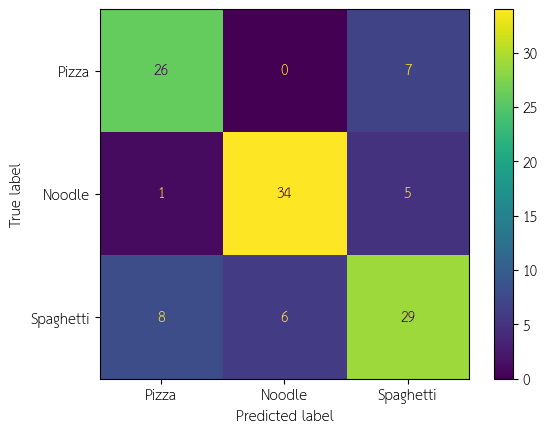

In [63]:
modmodel.plot_result_mainclass(np.argmax(y_test_main_class, axis=1), y_pred_main)

จากตาราง Confusion matrix สังเกตได้ว่าหมวดหมู่หลัก 'สปาเกตตี' มีค่า Recall ที่ต่ำ สาเหตุเกิดจากในชุดข้อมูลหมวดหมู่สปาเกตตีมีคำที่คล้ายคลึงกับอีกสองหมวดหมู่ (พิซซ่าเเละก๋วยเตี๋ยว) เเละไม่มีคีย์เวิร์ดที่บ่งบอกลักษณะเเน่ชัดของหมวดหมู่ของอาหาร เช่น พิซซ่ากับสปาเกตตีก็มีคำว่าชีส,เเป้ง, เเละอิตาลีเหมือนกัน เเต่ในชุดข้อมูลพิซซ่าจะมีลักษณะรูปร่างบอก เช่น วงกลมหรือวงรี ในส่วนของก๋วยเตี๋ยวกับสปาเกตตีก็มีคำว่าเเป้งหรือเส้นเหมือนกัน เเต่ในชุดข้อมูลก๋วยเตี๋ยวจะมีคำเพิ่มเติม เช่น ไทยหรือจีน เพราะสาเหตุนี้ ‘สปาเกตตี’ จึงอยู่ตรงกลางระหว่างสองหมวดหมู่คือพิซซ่าเเละก๋วยเตี๋ยว เป็นผลให้โมเดลไม่สามารถทำนายเป็นสปาเกตตีได้ อย่างไรก็ตามประสิทธิภาพดีขึ้นเมื่อเทียบกับโมเดล Baseline คือ
- ค่าความเเม่นยำโดยรวมของโมเดลเพิ่มขึ้น 0.01
- สามารถระบุหมวดหมู่หลัก 'ก๋วยเตี๋ยว' แม่นยำได้มากขึ้น (สังเกตจากค่า Recall)
- มีความเเม่นยำในการทำนาย 'พิซซ่า' มากขึ้น (สังเกตจากค่า Precision)


<H4>Main class - Modified

In [64]:
true_index = []     # เก็บ index ที่ทำนายถูกต้อง
for i in range(len(np.argmax(y_test_main_class, axis=1))):
    if np.argmax(y_test_main_class, axis=1)[i] == y_pred_main[i]:
        true_index.append(i)

false_main_label_full_model = []        # เก็บ index label ที่ทำนายผิด เพื่อเอา index นี้ไปหาประโยคที่ทำนายผิดใน excel
what_pred = []
for j in range(len(label_mainclass_keep_test)):
    if j not in true_index:
        false_main_label_full_model.append(label_mainclass_keep_test[j])
        what_pred.append(y_pred_main[j])

print(false_main_label_full_model)
print('------------------------------')
print(what_pred)

[540.0, 497.0, 477.0, 526.0, 435.0, 498.0, 545.0, 263.0, 37.0, 478.0, 439.0, 569.0, 276.0, 522.0, 107.0, 15.0, 351.0, 17.0, 281.0, 45.0, 186.0, 127.0, 533.0, 390.0, 282.0, 261.0, 397.0]
------------------------------
[1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1]


ตัวอย่างประโยคที่โมเดล Modified ทำนายหมวดหมู่หลักผิด
- ไปเที่ยวทะเล พอจะหาเมนูที่เกี่ยวกับซีฟู๊ด โดยมีความเป็นอาหารต่างชาติ แต่มีรสชาติเผ็ดแบบไทยๆ พอมีไอเดียหรือไม่ | ทำนาย สปาเกตตี เป็น ก๋วยเตี๋ยว
- วันนี้ทำงานค่อนข้างเหนื่อย อยากกินอาหารเบาๆ ไม่หนักแบบพิซซ่า แต่ยังมีความอยากกินชีสอยู่ ไม่เอาพวกเนื้อ | ทำนาย สปาเกตตี เป็น ก๋วยเตี๋ยว
- อยากได้เมนูที่มีแป้ง และก็มีผักเยอะๆ ที่เคี้ยวง่ายๆ ไม่ต้องออกแรงเยอะ | ทำนาย สปาเกตตี เป็น พิซซ่า
- อยากกินอาหารเผ็ดๆ ใส่พริกเยอะๆ มีรสชาติหลากหลาย เป็นเมนูขึ้นชื่อของไทย นำมาผสมกับประเทศจีน | ทำนาย ก๋วยเตี๋ยว เป็น สปาเกตตี
- มีส่วนผสมเป็นน้ำ น้ำมันมะกอก และเกลือ นำขึ้นตั้งไฟต้มจนน้ำเดือดแล้วใส่เส้นลงไปต้ม หมั่นคนเพื่อไม่ให้เส้นติด ต้มจนเส้นสุก กินคู่กับเนื้อ | ทำนาย สปาเกตตี เป็น ก๋วยเตี๋ยว
- อยากกินเส้นผสมกับต้มยำ มีรสชาติเผ็ด เปรี้ยว เค็ม และมีเส้นนุ่มๆ จากก๋วยเตี๋ยว สีน้ำซุปมีสีส้มเข้ม ดูจัดจ้าน | ทำนาย ก๋วยเตี๋ยว เป็น สปาเกตตี
- พิซซ่าที่มีสีเขียวเยอะ มีลักษณะเป็นวงกลมสลับกับสีขาวจากผักต่าง ๆ | ทำนาย พิซซ่า เป็น สปาเกตตี
- ฉันอยากกินอะไรหลายๆ อย่างมีเมนูอะไรที่สั่งแล้วกินอะไรหลายอย่างมั้ย | ทำนาย พิซซ่า เป็น สปาเกตตี
- แนะนำที่ใช้การอบ ที่มีการใส่กุ้ง ชีส สัปปะรด มะเขือเทศ | ทำนาย พิซซ่า เป็น สปาเกตตี
- อยากกินสปาเกตตี ที่ใส่กุ้ง ใส้หมึกช่วยแนะนำหน่อย | ทำนาย สปาเกตตี เป็น พิซซ่า

สามารถสรุปได้ดังนี้
- ส่วนมากประโยคที่ทายผิดจะมีชื่อของหมวดหมู่หลักอยู่ในประโยค (เช่น พิซซ่า, ก๋วยเตี๋ยว, เเละสปาเกตตี)
- ประโยคที่มีรายละเอียดน้อยและมีความกำกวมระหว่างสองหมวดหมู่หลัก เช่น 'อยากได้เมนูที่มีแป้ง และก็มีผักเยอะๆ ที่เคี้ยวง่ายๆ ไม่ต้องออกแรงเยอะ' ที่ไม่ได้ลงรายละเอียดว่าเป็นเส้นหรือไม่ทำให้โมเดลสับสนระหว่างสปาเกตตีกับพิซซ่า (อาจจะไปใกล้เคียงกับก๋วยเตี๋ยวด้วยเเต่ในชุดข้อมูลคลาสก๋วยเตี๋ยวจะมีพวกคำว่าเหนียวหรือหนึบทำให้โมเดลยังพอเเยกออก)
- ในประโยคทั่วไป โมเดลมักจะทำนายระหว่าง 'ก๋วยเตี๋ยว' กับ 'สปาเกตตี' ผิด เป็นเพราะสองหมวดหมู่นี้มีความใกล้เคียงกันทั้งรูปลักษณะ, วัตถุดิบ, เเละวิธีการประกอบอาหาร

#### **Sub Class Model (Don't Take Mainclass as input)**

In [65]:
y_pred_sub = modmodel.predict_subclass(X_test)

4/4 [==============================] - 2s 45ms/step


Classification report for sub class:
                   precision    recall  f1-score   support

   ShrimpCocktail       0.50      0.45      0.48        11
       MeatDeluxe       0.46      0.75      0.57         8
MushroomsTomatoes       0.25      0.12      0.17         8
           Dipper       0.38      0.50      0.43         6
           NamTok       0.78      0.54      0.64        13
           TomYam       0.31      0.33      0.32        12
       EggNoodles       0.50      0.57      0.53         7
           Kaolao       0.60      0.75      0.67         8
         Meatball       0.20      0.25      0.22         8
        Carbonara       0.00      0.00      0.00        10
        Vegetable       0.40      0.43      0.41        14
          Seafood       0.46      0.55      0.50        11

         accuracy                           0.43       116
        macro avg       0.40      0.44      0.41       116
     weighted avg       0.41      0.43      0.41       116



<Figure size 1000x1000 with 0 Axes>

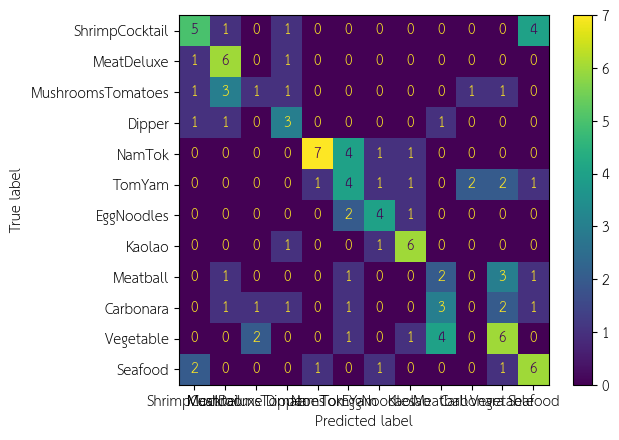

In [66]:
modmodel.plot_result_subclass(np.argmax(y_test_sub_class, axis=1), y_pred_sub)

จากตาราง Confusion matrix สังเกตว่าโมเดลสามารถหาหรือระบุหมวดหมู่ย่อยจริงส่วนใหญ่ได้ไม่ดีสังเกตจากค่า Recall ที่น้อย อาจจะเป็นเพราะเมนูเเต่ละเมนูมีความใกล้เคียงกัน เช่น มีวัตถุดิบ, ส่วนประกอบ, หรือลักษณะรูปร่างคล้ายคลึงกัน เเต่ในบางเมนูอย่าง ‘สปาเกตตีคาโบนาร่า’ โมเดลไม่สามารถตรวจจับเมนูนี้ได้เลย (ค่า Recall เป็น 0) ซึ่งทางคณะผู้จัดทำยังไม่เเน่ใจในปัญหาส่วนนี้

<H4>Sub class - Modified

In [67]:
true_index = []    
for i in range(len(np.argmax(y_test_sub_class, axis=1))):
    if np.argmax(y_test_sub_class, axis=1)[i] == y_pred_sub[i]:
        true_index.append(i)

false_sub_label_full_model = []
what_pred = []    
for j in range(len(label_subclass_keep_test)):
    if j not in true_index:
        false_sub_label_full_model.append(label_subclass_keep_test[j])
        what_pred.append(y_pred_sub[j])

print(false_sub_label_full_model)
print('------------------------------')
print(what_pred)

[414.0, 540.0, 497.0, 231.0, 477.0, 211.0, 526.0, 175.0, 159.0, 225.0, 435.0, 498.0, 415.0, 545.0, 263.0, 37.0, 478.0, 250.0, 31.0, 342.0, 14.0, 439.0, 395.0, 569.0, 276.0, 202.0, 210.0, 509.0, 132.0, 393.0, 522.0, 107.0, 15.0, 235.0, 75.0, 103.0, 455.0, 481.0, 351.0, 17.0, 271.0, 281.0, 45.0, 473.0, 441.0, 573.0, 492.0, 142.0, 186.0, 311.0, 127.0, 440.0, 433.0, 533.0, 390.0, 282.0, 299.0, 261.0, 494.0, 434.0, 301.0, 102.0, 283.0, 108.0, 397.0, 85.0]
------------------------------
[10, 4, 7, 5, 5, 5, 2, 0, 1, 5, 3, 2, 10, 6, 10, 11, 1, 6, 3, 6, 1, 2, 10, 0, 11, 7, 6, 8, 3, 11, 5, 9, 11, 5, 0, 1, 10, 8, 3, 11, 7, 10, 11, 10, 11, 10, 8, 1, 8, 7, 10, 8, 8, 0, 1, 9, 5, 9, 8, 8, 5, 0, 4, 1, 5, 3]


ตัวอย่างประโยคที่โมเดล Modified ทำนายหมวดหมู่ย่อยผิด
- อาหารที่คนออกกำลังกายอยากกินเสร็จผสมด้วยเนื้อสัตว์และเส้นสปาเกตตี | ทำนาย สปาเกตตีมีทบอล เป็น สปาเกตตีผัก
- ไปเที่ยวทะเล พอจะหาเมนูที่เกี่ยวกับซีฟู๊ด โดยมีความเป็นอาหารต่างชาติ แต่มีรสชาติเผ็ดแบบไทยๆ พอมีไอเดียหรือไม่ | ทำนาย สปาเกตตีทะเล เป็น ก๋วยเตี๋ยวน้ำตก
- อาหารที่มีซอสสีขาวๆราดอยู่เล็กน้อยหรือมากก็ได้มีรสชติหวามเค็มมากๆ มีผักอยู่บ้าง มีการโรยชีสและมีแฮม | ทำนาย สปาเกตตีคาโบนาร่า เป็น ดิปเปอร์
- อยากกินสปาเกตตีผัก | ทำนาย สปาเกตตีผัก เป็น เห็ดและมะเขือเทศ
- อาหารสปาเกตตีที่มีการทำ 3 ขั้นตอนคือการที่นำเนื้อสัตว์ไปทอดกับการที่เคี่ยวซอสมะเขือเทศและการต้มเส้นพาสต้า | ทำนาย สปาเกตตีมีทบอล เป็น สปาเกตตีผัก
- อยากกินอาหารทะเล ประเภทแป้งที่เป็นเส้น มีความเหนียวหนึบ อาจจะมีซอสซีฟู๊ดเป็นเครื่องเคียงด้วย | ทำนาย สปาเกตตีทะเล เป็น บะหมีหมูแดงหมูกรอบ
- อยากกินอาหารเผ็ดๆ ใส่พริกเยอะๆ มีรสชาติหลากหลาย เป็นเมนูขึ้นชื่อของไทย นำมาผสมกับประเทศจีน | ทำนาย ก๋วยเตี๋ยวต้มยำน้ำใส เป็น สปาเกตตีผัก
- พิซซ่าที่มีกุ้ง เห็ด  สับปะรด มันชื่อว่าพิซซ่าอะไร | ทำนาย ค็อกเทลกุ้ง เป็น สปาเกตตีทะเล
- สามารถหาซื้อได้จากร้านสะดวกซื้อร้านอาหารทั่วไป มีแป้งและไขมันเยอะ และโปรตีนเล็กน้อย | ทำนาย สปาเกตตีคาโบนาร่า เป็น มีทเดอลุกซ์
- อาหารที่นิยมสำหรับคนไทยเนื่องจากมีความเผ็ดและเปรี้ยวที่มีเอกลักษณ์ ใส่เครื่องปรุง น้ำตาลทราย น้ำมะนาว น้ำปลา พริกแห้งคั่วป่น และน้ำพริกเผา | ทำนาย ก๋วยเตี๋ยวต้มยำน้ำใส เป็น บะหมีหมูแดงหมูกรอบ

สามารถสรุปได้ดังนี้
- โมเดลมีการทำนายหมวดหมู่ย่อยผิดกันเองภายในหมวดหมู่หลัก เป็นเพราะในเเต่ละหมวดหมู่ย่อยมีประโยคหรือชุดข้อมูลที่มีคำหรือคีย์เวิร์ดที่คล้ายๆ กัน ยกตัวอย่างประโยค 'อาหารที่คนออกกำลังกายอยากกินเสร็จผสมด้วยเนื้อสัตว์และเส้นสปาเกตตี' ที่ทำนาย 'สปาเกตตีมีทบอล' ออกเป็น 'สปาเกตตีผัก' ซึ่งเกิดจากในชุดข้อมูลของทั้งสองเมนูนี้มีคำว่า 'ผัก' อยู่ เป็นเหตุทำให้โมเดลสับสนระหว่างสองเมนูนี้ได้
- มีบางประโยคที่เมื่อมีชื่อของหมวดหมู่หลักเเล้วโมเดลจะทำนายผิด
- โมเดลยังมีการทำนายหมวดหมู่หลักผิดอยู่บางประโยค เเต่โมเดลสามารถทำนายหมวดหมู่ย่อยได้ถูกมากขึ้น ยกตัวอย่าง 'พิซซ่าที่มีกุ้ง เห็ด  สับปะรด มันชื่อว่าพิซซ่าอะไร' โมเดลไม่สามารถทำนายเป็นพิซซ่าได้ เเต่สามารถทำนายเป็นเมนูที่เกี่ยวข้องกับทะเล (กุ้ง) คือสปาเกตตีทะเล ซึ่งเป็นหมวดหมู่ย่อยทะเลเหมือนกัน

#### **Interaction Model**

In [68]:
pred_interaction = modmodel.predict_interaction(X_test, y_test_main_class)

4/4 [==============================] - 2s 49ms/step


Classification report for sub class:
                   precision    recall  f1-score   support

   ShrimpCocktail       0.73      0.73      0.73        11
       MeatDeluxe       0.50      0.75      0.60         8
MushroomsTomatoes       0.67      0.25      0.36         8
           Dipper       0.43      0.50      0.46         6
           NamTok       0.78      0.54      0.64        13
           TomYam       0.57      0.67      0.62        12
       EggNoodles       0.57      0.57      0.57         7
           Kaolao       0.70      0.88      0.78         8
         Meatball       0.29      0.50      0.36         8
        Carbonara       1.00      0.10      0.18        10
        Vegetable       0.56      0.64      0.60        14
          Seafood       0.83      0.91      0.87        11

         accuracy                           0.59       116
        macro avg       0.64      0.59      0.56       116
     weighted avg       0.65      0.59      0.58       116



<Figure size 1000x1000 with 0 Axes>

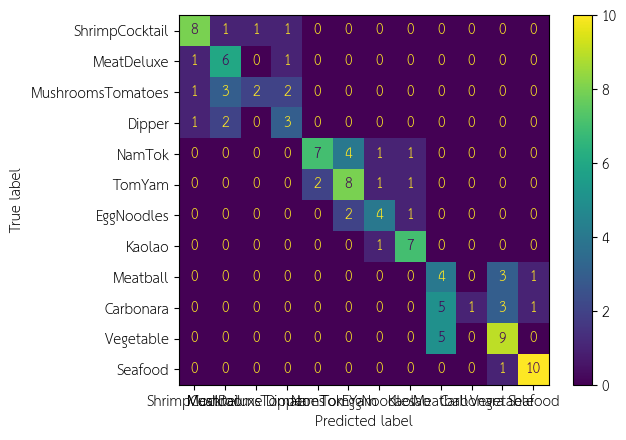

In [69]:
modmodel.plot_result_subclass(np.argmax(y_test_sub_class, axis=1), pred_interaction)

จากตาราง Confusion matrix สังเกตได้ว่าหมวดหมู่ย่อยที่อยู่ภายใน 'พิซซ่า' โมเดลสามารถหาหรือระบุได้ดี (จากค่า Recall ของ ค็อกเทลกุ้ง, เเละมีทเดอลุกซ์) ยกเว้นเห็ดและมะเขือเทศ, เเละดิปเปอร์ ซึ่งอาจจะเป็นผลมาจากพิซซ่าเห็ดและมะเขือเทศเป็นเมนูที่มีวัตถุดิบใกล้เคียงกับเมนูอื่นๆ เช่น ผัก เห็ด ส่วนดิปเปอร์เป็นเมนูที่รวมวัตถุดิบหลายอย่างจากเมนูอื่นๆ เข้าด้วยกัน ทำให้โมเดลอาจจะระบุยากว่าที่ทำนายอยู่เป็นพิซซ่าเห็ดและมะเขือเทศหรือดิปเปอร์จริงๆ ในส่วนของหมวดหมู่ย่อยที่อยู่ภายใน 'ก๋วยเตี๋ยว' หลายๆ เมนูมีค่า Recall ค่อนข้างต่ำยกเว้นเกาเหลา ซึ่งสิ่งที่ทำให้โมเดลระบุเกาเหลาได้ดีคิดว่าน่าจะเป็นเพราะชุดข้อมูลประโยคส่วนมากมีคำว่า 'ข้าว' อยู่ ทำให้เกาเหลานั้นเเต่ต่างกับเมนูอื่นๆ ภายในหมวดหมู่ 'ก๋วยเตี๋ยว' ในส่วนสุดท้ายหมวดหมู่ย่อย 'สปาเกตตี' มีลักษณะคล้ายก๋วยเตี๋ยว คือมีเมนูที่มีค่า Recall สูงเมนูเดียวคือสปาเกตตีทะเล คิดว่าเป็นเพราะสปาเกตตีทะเลมีคำที่เเตกต่างจากเมนูอื่นๆ เช่น กุ้ง ปลา ซีฟู๊ด ซึ่งไม่มีคำเหล่านี้ในชุดข้อมูลของเมนูอื่นๆ นอกจากนั้นในชุดข้อมูลอื่นๆ เช่น สปาเกตตีคาโบนาร่า, สปาเกตตีมีทบอล, เเละสปาเกตตีผัก ยังมีคำคล้ายๆ กัน เช่น โปรตีน เนื้อ ผัก ที่กล่าวมาทำให้โมเดลสามารถหาเเละระบุสปาเกตตีทะเลได้ดีที่สุดภายในหมวดหมู่ย่อย 'สปาเกตตี' ในส่วนถัดไปคณะผู้จัดทำได้ทดลองดึงประโยคบางประโยคที่โมเดลทำนายผิดมาวิเคราะห์ได้ดังนี้

<H4>Interaction model

In [70]:
true_index = []    
for i in range(len(np.argmax(y_test_sub_class, axis=1))):
    if np.argmax(y_test_sub_class, axis=1)[i] == pred_interaction[i]:
        true_index.append(i)

false_sub_label_interaction = []
what_pred = []    
for j in range(len(label_subclass_keep_test)):
    if j not in true_index:
        false_sub_label_interaction.append(label_subclass_keep_test[j])
        what_pred.append(pred_interaction[j])

print(false_sub_label_interaction)
print('------------------------------')
print(what_pred)

[414.0, 497.0, 231.0, 477.0, 211.0, 175.0, 159.0, 225.0, 415.0, 478.0, 250.0, 31.0, 342.0, 14.0, 439.0, 395.0, 202.0, 210.0, 509.0, 132.0, 393.0, 107.0, 15.0, 235.0, 75.0, 103.0, 455.0, 481.0, 271.0, 281.0, 473.0, 441.0, 573.0, 492.0, 142.0, 186.0, 311.0, 440.0, 433.0, 299.0, 494.0, 434.0, 301.0, 102.0, 283.0, 108.0, 85.0]
------------------------------
[10, 8, 5, 8, 5, 0, 1, 5, 10, 8, 6, 3, 6, 1, 10, 10, 7, 6, 8, 3, 11, 3, 2, 5, 0, 1, 10, 8, 7, 4, 10, 11, 10, 8, 1, 1, 7, 8, 8, 5, 8, 8, 5, 0, 4, 1, 3]


ตัวอย่างประโยคที่โมเดล Interaction ทำนายหมวดหมู่ย่อยผิด
- อาหารที่คนออกกำลังกายอยากกินเสร็จผสมด้วยเนื้อสัตว์และเส้นสปาเกตตี | ทำนาย สปาเกตตีมีทบอล เป็น สปาเกตตีผัก
- วันนี้ทำงานค่อนข้างเหนื่อย อยากกินอาหารเบาๆ ไม่หนักแบบพิซซ่า แต่ยังมีความอยากกินชีสอยู่ ไม่เอาพวกเนื้อ | ทำนาย สปาเกตตีผัก เป็น สปาเกตตีมีทบอล
- ต้องการอะไรที่กินง่ายๆ ไม่ต้องเตรียมของมากเน้นเนื้อไม่เน้นผัก | ทำนาย มีทเดอลุกซ์ เป็น ดิปเปอร์
- อยากกินเห็ด มะเขือเทศ หอมใหญ่ พริกหวาน กินคู่กับชีสหรือซอสมะเขือเทศ บนแป้งร้อนๆ รูปร่างกลมๆ ที่ผ่านการอบมาใหม่ๆ | ทำนาย เห็ดและมะเขือเทศ เป็น มีทเดอลุกซ์
- ใช้เวลาน้อย ใส่เกี๊ยวน้ำได้ เส้นมันๆ รสชาติค่อนไปทางจืด ไม่เผ็ด มีผักคะน้ารองด้านล่าง สามารถเพิ่มลูกชิ้นได้ บางร้านมีน้ำซอสซีอิ๊วให้ราด | ทำนาย บะหมีหมูแดงหมูกรอบ เป็น ก๋วยเตี๋ยวต้มยำน้ำใส
- อาหารที่มีความกรอบขายเป็นชาม ๆ เหมาะกับการกินคนเดียวสามารถหาร้านได้ทั่วไป มีลักษณะคล้ายเรือ | ทำนาย ก๋วยเตี๋ยวน้ำตก เป็น เกาเหลา
- เป็นอาหารที่มีความเป็นไทยเน้นรสชาติที่เค็มและกินคู่กับข้าว | ทำนาย เกาเหลา เป็น บะหมีหมูแดงหมูกรอบ
- อยากกินพิซซ่าหน้าซีฟู๊ด มีพวกมะเขือเทศ เห็ด หรือสัปปะรด ชีสเยิ้มๆ หวานมันกำลังดี | ทำนาย ค็อกเทลกุ้ง เป็น มีทเดอลุกซ์
- พิซซ่าสำหรับคนที่อยากได้วิตามินเพิ่มเติมและไม่ชอบกินเนื้อ ส่วนประกอบหลักคือแป้ง | ทำนาย เห็ดและมะเขือเทศ เป็น มีทเดอลุกซ์
- ส่วนใหญ่เป็นสีโทนเหลือง ทั้งจากซอส ชีส ไข่ ตัดกับสีน้ำตาลเข้มของเบคอนที่กรุบกรอบกำลังดี | ทำนาย สปาเกตตีคาโบนาร่า เป็น สปาเกตตีผัก

สามารถสรุปได้ดังนี้
- โมเดลสามารถทำนายประโยคที่มีชื่อของหมวดหมู่หลักได้ใกล้เคียงกับผลเฉลยของหมวดหมู่หลักได้เเล้ว เช่น 'วันนี้ทำงานค่อนข้างเหนื่อย อยากกินอาหารเบาๆ ไม่หนักแบบพิซซ่า แต่ยังมีความอยากกินชีสอยู่ ไม่เอาพวกเนื้อ' สามารถทำนายเป็นสปาเกตตีมีทบอล เเต่ยังไม่ค่อยเเม่นยำในการทำนายหมวดหมู่ย่อย (ผลเฉลยประโยคข้างต้นคือ สปาเกตตีผัก) อีกหนึ่งตัวอย่างคือ 'อาหารที่คนออกกำลังกายอยากกินเสร็จผสมด้วยเนื้อสัตว์และเส้นสปาเกตตี' สามารถทำนายเป็นหมวดหมู่หลัก 'สปาเกตตี' ได้ เเต่หมวดหมู่ย่อยโมเดลยังทำนายผิดอยู่
- บางประโยคมีข้อมูลเเค่เบื้องต้น ทำให้โมเดลทำนายไม่เเม่นยำ เช่น 'อาหารที่มีความกรอบขายเป็นชาม ๆ เหมาะกับการกินคนเดียวสามารถหาร้านได้ทั่วไป' โมเดลทำนายเป็น เกาเหลา เเทนที่จะเป็น ก๋วยเตี๋ยวน้ำตก ซึ่งเข้าใจได้เพราะภายในประโยคไม่มีข้อมูลที่บ่งบอกถึงคุณลักษณะเฉพาะของเมนูเป้าหมายเลย

#### **Save Model**

In [120]:
ModelTraining = modmodel.training_model
MainModel = modmodel.main_class_inference_model
SubModel = modmodel.sub_class_inference_model
InteractionModel = modmodel.interaction_model

In [121]:
# ModelTraining.save('ModelTraining.h5')
# MainModel.save('MainModel.h5')
# SubModel.save('SubModel.h5')
# InteractionModel.save('InteractionModel.h5')

In [122]:
# plot_model(ModelTraining, to_file='ModelTraining.png', show_shapes=True, show_layer_names=True)
# plot_model(MainModel, to_file='MainModel.png', show_shapes=True, show_layer_names=True)
# plot_model(SubModel, to_file='SubModel.png', show_shapes=True, show_layer_names=True)
# plot_model(InteractionModel, to_file='InteractionModel.png', show_shapes=True, show_layer_names=True)